# Temp

Let the true population be defined as a total of $1000$ people. We imagine that this is all the 
people in the world.

Amongst the 1000 people, 100 people is of height 1cm, 100 people is of height 2cm, 100 people is of height 3cm, 
this holds true for all heights from 1cm to 10cm. We will assume that there are only 10 discrete heights
that people can be. 

Let the experiment be a triplet $\pspace$, this experiment is the action of ***randomly selecting***
a person from the true population.

Since our problem is about the height of the person, it is reasonable to define our sample space
to $\Omega = \{1,2,3,4,5,6,7,8,9,10\}$, where each element of the sample space is the outcome of the experiment.
Note that our sample space is discrete and there is only 10 distinct outcomes.

Now suppose I want to answer a few simple questions about the experiment. For example, I want to know

1. What is the probability of selecting a person of height 1cm?
2. What is the probability of selecting a person that is taller than 5cm (i.e. height 6cm, 7cm, 8cm, 9cm, 10cm)?
3. What is the mean height of the true population (expected value)?


With that, we will define a random variable $X$. Let $X$ be the height of a randomly selected person from the true population.

Then since $X$ is a function $X: \Omega \rightarrow \mathbb{R}$, we first check if there is a need to 
define a new mapping from $\Omega$ to $\mathbb{R}$. It turns out that we can just use the identity mapping
since the sample space $\Omega$ is already a subset of $\mathbb{R}$, and are just numbers. With that,
the ***state space*** $X(\Omega)$ is $\{1,2,3,4,5,6,7,8,9,10\}$.

Once the ***state space*** (the range) is defined, we can associate each state
$x \in X(\S)$ with a probability $P(X = x)$. This is the ***probability mass function*** (PMF) of $X$.

Matplotlib is building the font cache; this may take a moment.


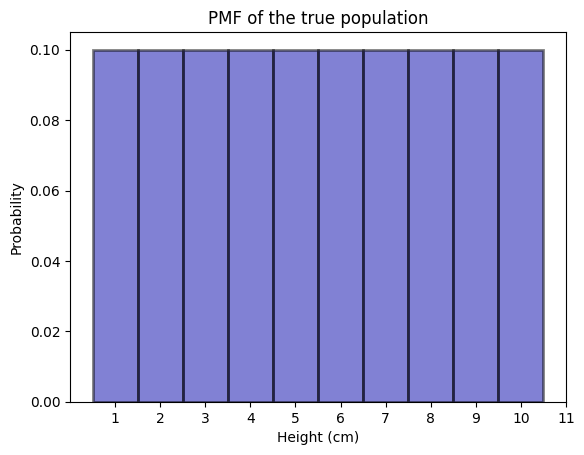

In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(1992)
np.random.seed(1992)

true_population = np.arange(1, 11, 1).repeat(100)

bins = np.arange(1, true_population.max() + 1.5) - 0.5
fig, ax = plt.subplots()
_ = ax.hist(
    true_population,
    bins,
    density=True,
    color="#0504AA",
    alpha=0.5,
    edgecolor="black",
    linewidth=2,
)
_ = ax.set_xticks(np.arange(1, 11, 1))
_ = ax.set_xlabel("Height (cm)")
_ = ax.set_ylabel("Probability")
_ = ax.set_title("PMF of the true population")
ax.set_xticks(bins + 0.5);

The above is the ideal histogram, which is the PMF. More concretely, for each 
state $x \in X(\S)$, the probability of $X$ being $x$ is $P(X = x) = 1/10$.

$$
\begin{align}
\P(X=x) = \begin{cases}
\frac{1}{10} \text{ if } x=1 \\
\frac{1}{10} \text{ if } x=2 \\
\frac{1}{10} \text{ if } x=3 \\
\vdots \\
\frac{1}{10} \text{ if } x=10 \\
\end{cases}
\end{align}
$$

Now recall that the PMF is a probability distribution and is ***deteministic***. There is 
nothing random about the PMF since we defined it according to the true population. In other words,
the true population, our "universe", has enumerated all the possible states and their probabilities.

With PMF, we can also answer questions 1,2 and 3.

1. $\P(X=1) = \frac{1}{10} = 0.1$
2. $\P(X > 5) = \P(X=6) + \P(X=7) + \P(X=8) + \P(X=9) + \P(X=10) = \frac{5}{10} = 0.5$
3. $\exp \lsq X \rsq = \sum_{x \in X(\S)} x \cdot \P(X=x) = \frac{1}{10} \cdot 1 + \frac{1}{10} \cdot 2 + \frac{1}{10} \cdot 3 + \cdots + \frac{1}{10} \cdot 10 = 5.5$

We can also say that $X$ follows a **discrete uniform distribution**. This is also true because in probability theory and statistics, 
the discrete uniform distribution is a symmetric probability distribution wherein a finite number of
values are equally likely to be observed; every one of n values has equal probability 1/n.

Now connecting this concept back to {cite}`chan_2021` chapter 3.2.4 on PMF vs empirical histogram. The idea seems
more apparent now.

```{figure} ./assets/generative_vs_inference.PNG
---
name: fig:generative_vs_inference
---
Generative vs Inference, credits to {cite}`chan_2021`
```

Given a PMF and an associated random variable $X$, we can generate a sample of size $n$ from the PMF.
This process is called **synthesis** ***if*** we know the true PMF, then we can generate more data
from the true population to train a model. This is the generative process.

Now, the more common case is that we do not know the true PMF. We only have a sample of size $n$ from
the true population. We are given a dataset by our stakeholders, and then we want to estimate the
PMF. This process is called **estimate/inference**. In our current example, this is not very 
obvious because an uniform distribution does not have parameters to estimate (i.e. [non-parametric](https://en.wikipedia.org/wiki/Discrete_uniform_distribution)).

But we can still make sense of it with the following example.